# Contents

1. Absenteeism at work Data Set
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Concluding Remarks

# 1. Absenteeism at work Data Set

# Data Set Information:
The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management

Attribute Information:

1. Individual identification (ID)
2. Reason for absence (ICD).
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

I Certain infectious and parasitic diseases
II Neoplasms
III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
IV Endocrine, nutritional and metabolic diseases
V Mental and behavioural disorders
VI Diseases of the nervous system
VII Diseases of the eye and adnexa
VIII Diseases of the ear and mastoid process
IX Diseases of the circulatory system
X Diseases of the respiratory system
XI Diseases of the digestive system
XII Diseases of the skin and subcutaneous tissue
XIII Diseases of the musculoskeletal system and connective tissue
XIV Diseases of the genitourinary system
XV Pregnancy, childbirth and the puerperium
XVI Certain conditions originating in the perinatal period
XVII Congenital malformations, deformations and chromosomal abnormalities
XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
XIX Injury, poisoning and certain other consequences of external causes
XX External causes of morbidity and mortality
XXI Factors influencing health status and contact with health services.

And 7 categories without (CID) patient follow-up (22), medical consultation (23), blood donation (24), laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target

# 2. Problem Definition

Predicting Absenteeism time in hours based on given attributes. We will use linear Regression.

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [124]:
df=pd.read_excel('Absenteeism_at_work.xls')
df.head(20)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239554,...,0,3,1,0,0,1,88,172,29,8


In [13]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

# 3. Data Analysis(EDA)

In [19]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [77]:

collist=df.columns.values
ncol=2
nrows=14

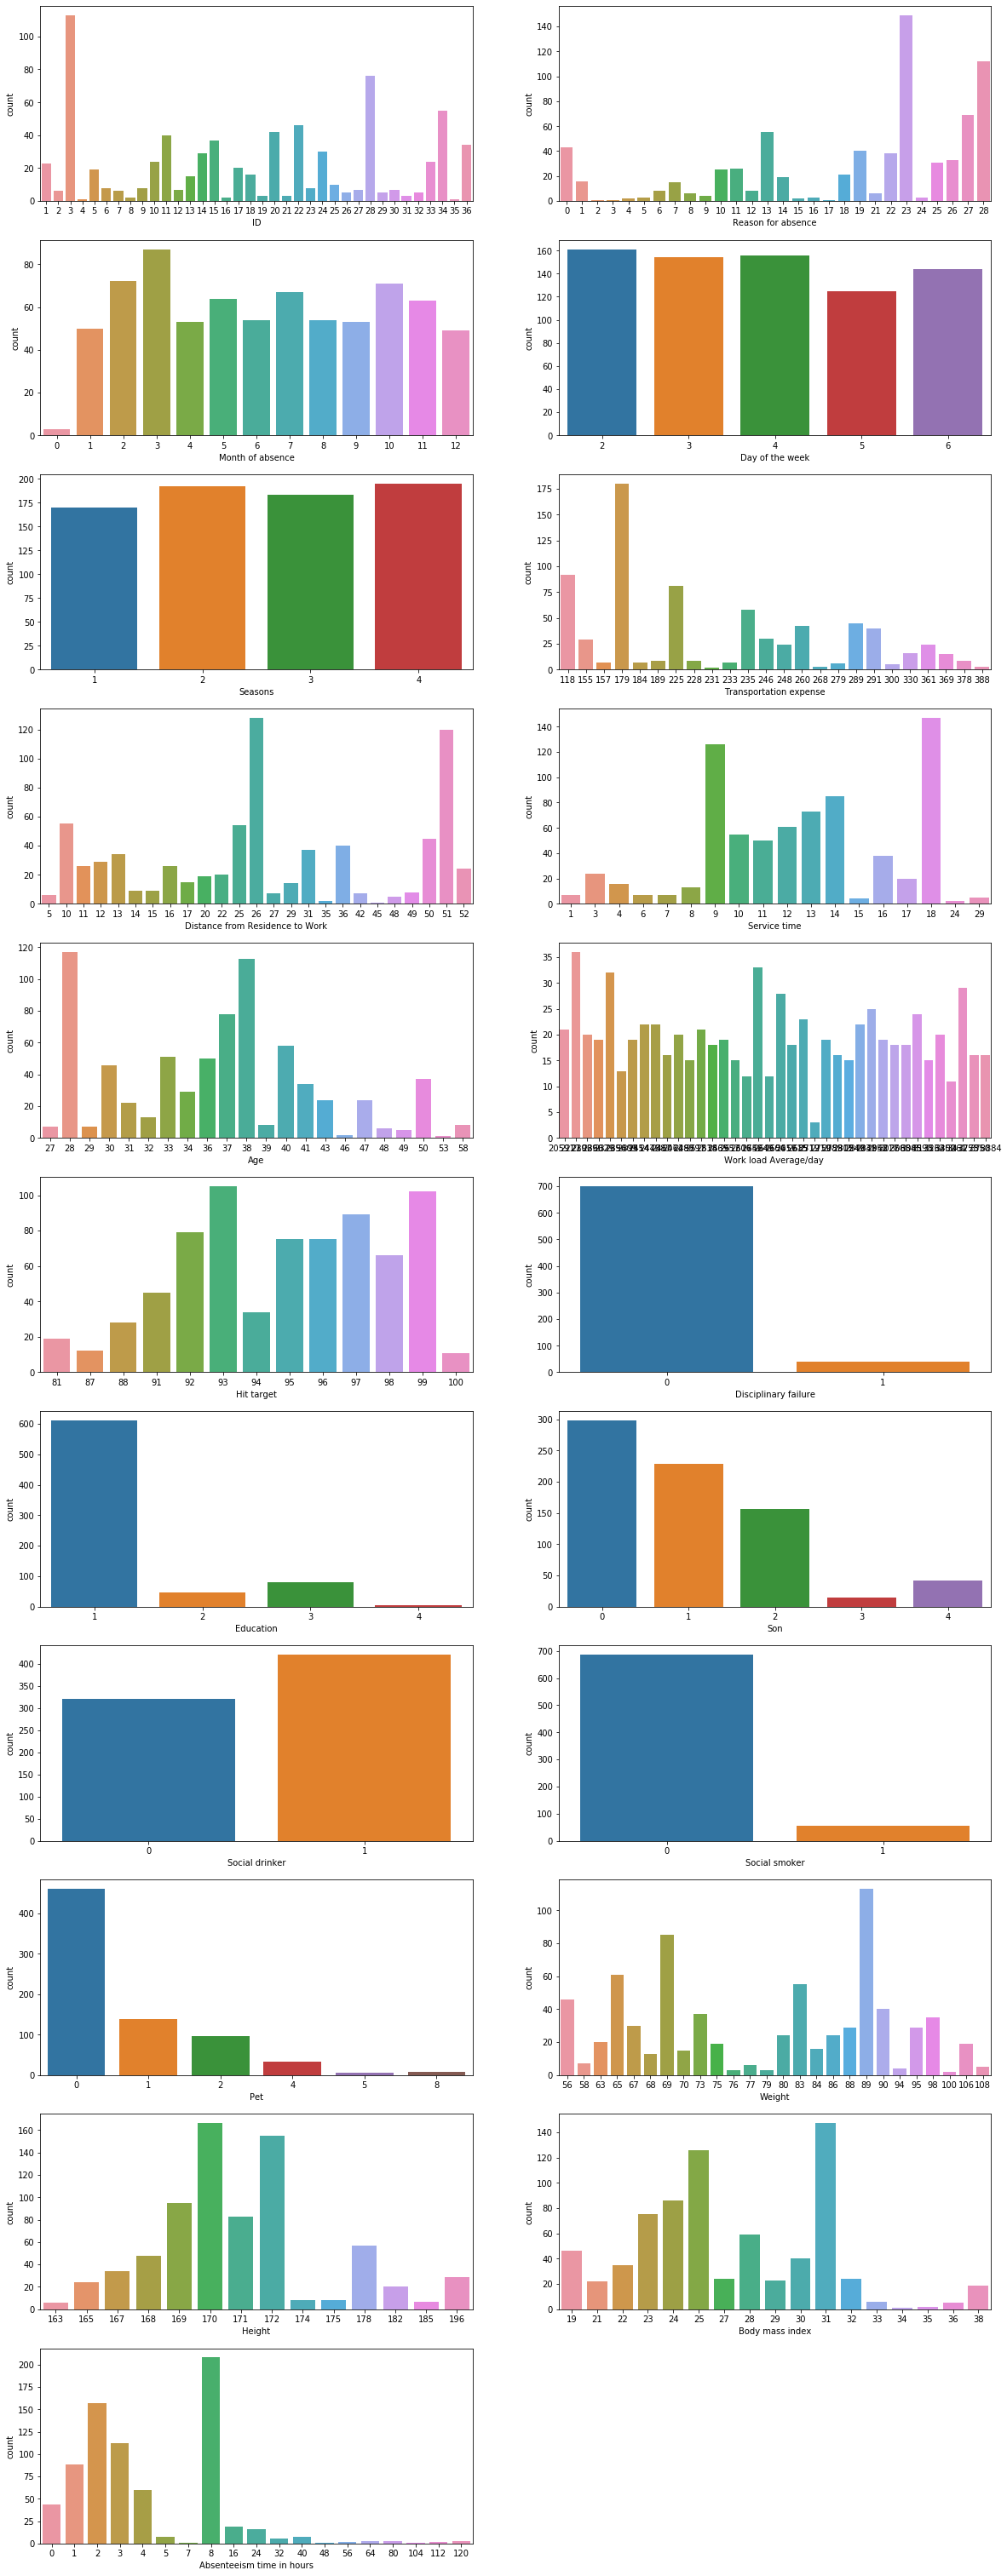

In [80]:
plt.figure(figsize=(20,70))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=df[collist[i]],data=df)
    

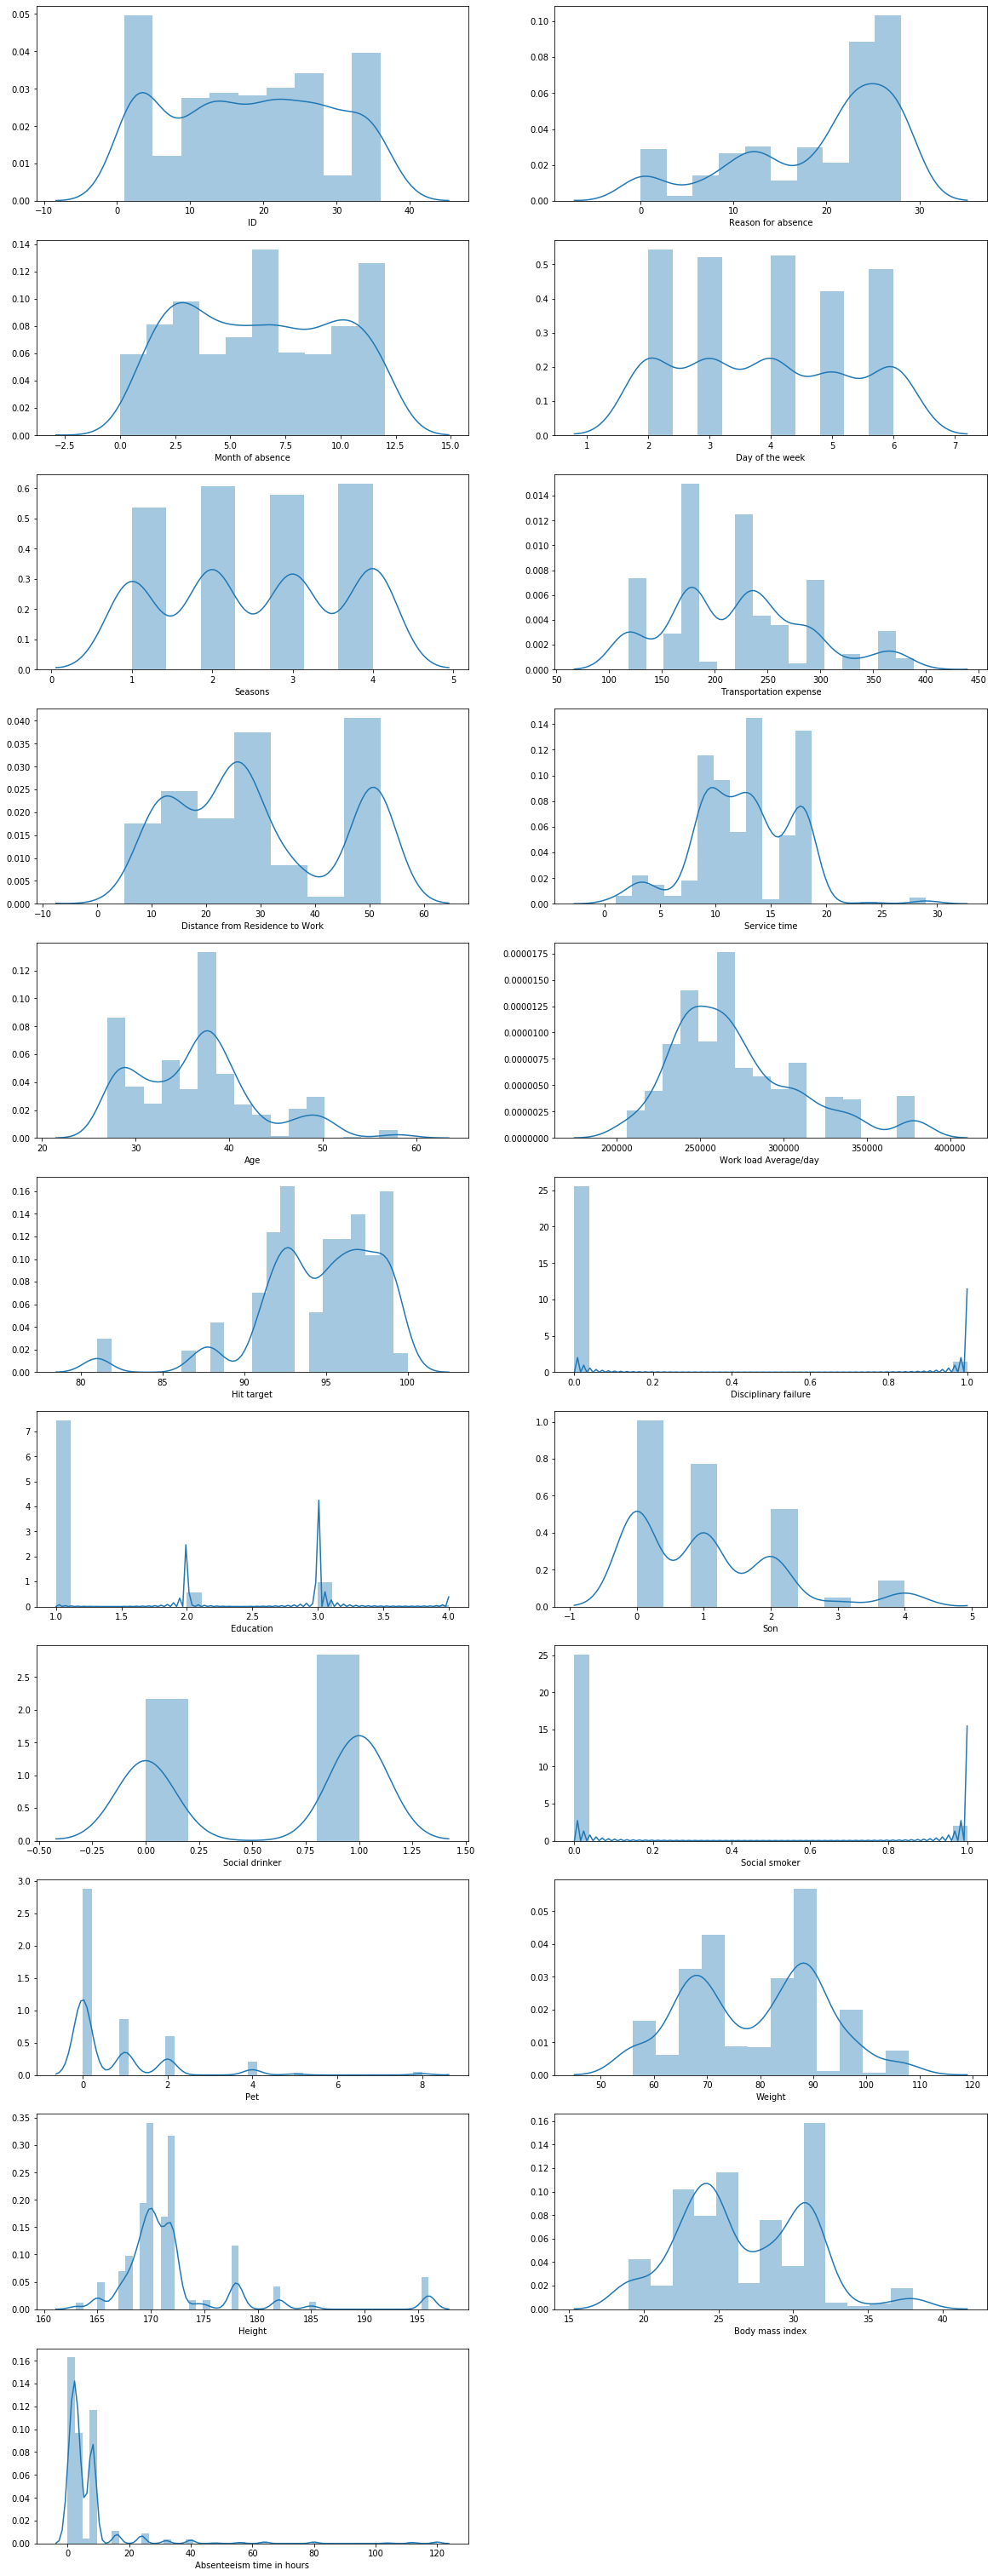

In [81]:
plt.figure(figsize=(20,70))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
   

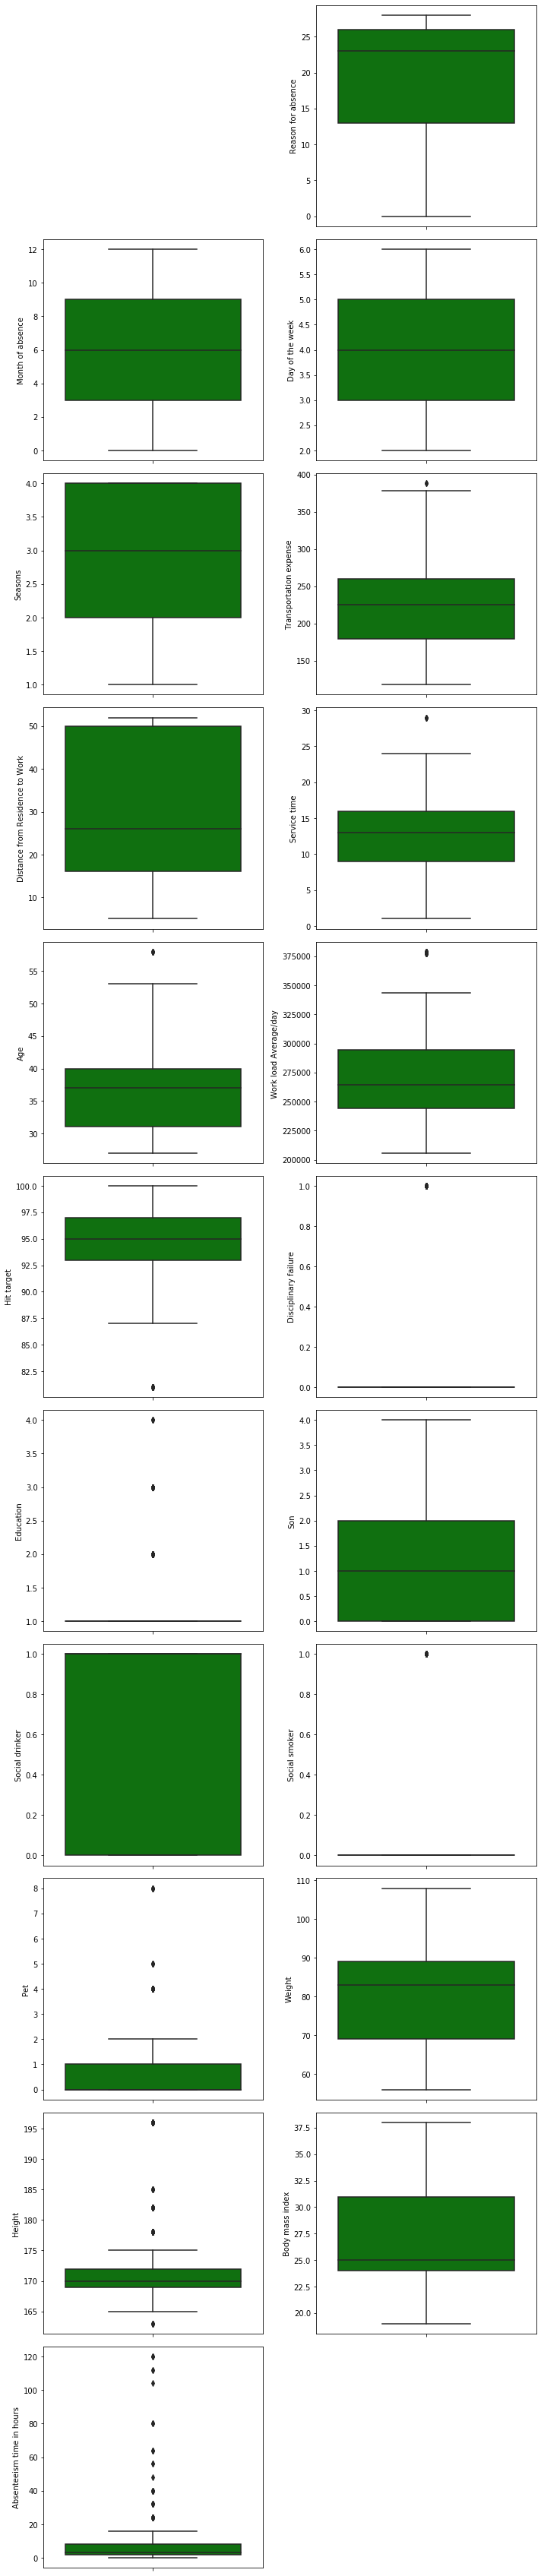

In [115]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(10,60))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [117]:
#Lets describe the data statistically
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [118]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


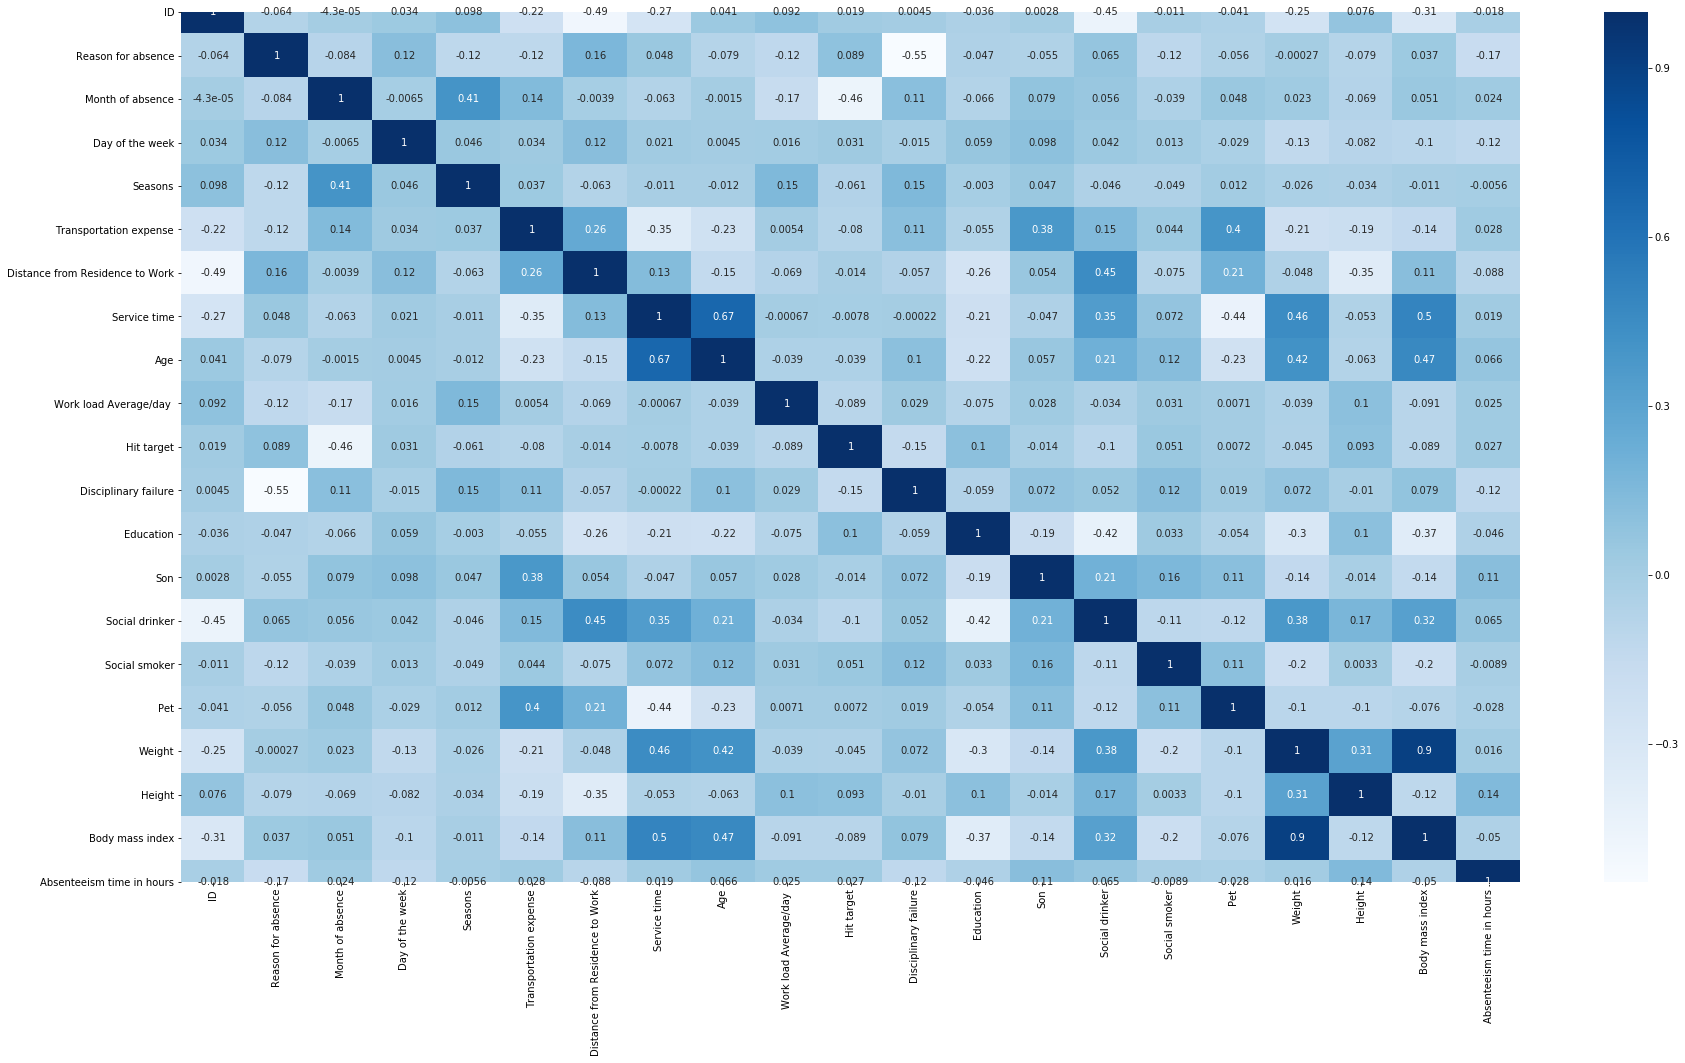

In [119]:
plt.figure(figsize = (30,16))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

In [126]:
#Now lets check the skewness
df.skew()

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          2.108953
Son                                1.086465
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64

In [127]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [129]:
df.skew()

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Day of the week                    0.102440
Seasons                           -0.038532
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.268628
Work load Average/day              0.617762
Hit target                        -1.261708
Disciplinary failure               3.952270
Education                          1.968323
Son                                0.254626
Social drinker                    -0.273327
Social smoker                      3.290333
Pet                                1.192919
Weight                             0.017001
Height                             2.429570
Body mass index                    0.305046
Absenteeism time in hours          0.749686
dtype: float64

# 4. Pre-processing Pipeline

In [130]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.63716146, 0.80493838, 0.19676258, ..., 0.00267975, 0.77593223,
        0.0244083 ],
       [1.63271857, 2.28012426, 0.19676258, ..., 1.01724856, 1.00943766,
        1.8460481 ],
       [1.36352307, 0.44896961, 0.19676258, ..., 0.3505325 , 1.00943766,
        0.56926297],
       ...,
       [1.27272787, 2.28012426, 1.84169773, ..., 0.3505325 , 1.70995395,
        1.8460481 ],
       [0.90954706, 2.28012426, 1.84169773, ..., 0.3505325 , 1.94345938,
        1.8460481 ],
       [1.54192337, 2.28012426, 1.84169773, ..., 0.5116309 , 0.39159492,
        1.8460481 ]])

In [131]:
threshold=3
print(np.where(z>3))

(array([  1,   3,   8,  27,  31,  33,  38,  44,  50,  51,  54,  55,  58,
        64,  83,  85,  89,  91,  99, 116, 140, 157, 158, 164, 165, 167,
       169, 172, 180, 186, 188, 199, 200, 203, 203, 205, 206, 210, 213,
       213, 214, 215, 215, 216, 226, 231, 232, 234, 236, 242, 245, 251,
       253, 256, 257, 270, 271, 272, 273, 273, 274, 275, 276, 276, 277,
       277, 278, 279, 280, 281, 282, 283, 284, 285, 285, 286, 287, 288,
       293, 294, 299, 300, 303, 311, 312, 313, 313, 322, 323, 323, 325,
       336, 336, 337, 337, 355, 360, 362, 384, 396, 397, 400, 405, 406,
       407, 420, 421, 432, 433, 446, 468, 469, 471, 479, 481, 488, 498,
       507, 510, 513, 530, 548, 549, 551, 562, 564, 569, 569, 572, 573,
       575, 576, 577, 579, 592, 594, 601, 603, 608, 622, 647, 648, 652,
       661, 670, 675, 681, 682, 682, 683, 688, 690, 690, 691, 692, 695,
       702, 703, 704, 706, 710, 712, 714, 714, 715, 721, 724, 726, 729,
       734, 737], dtype=int64), array([11, 15, 18, 15, 15, 15, 

In [132]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers
df_new

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,3.526361,12.386538,...,0.0,0.693147,1.098612,1,0.0,0.693147,90,5.153292,30,1.609438
2,3,23,7,4,1,179,51,18,3.663562,12.386538,...,0.0,0.693147,0.000000,1,0.0,0.000000,89,5.141664,31,1.098612
4,11,23,7,5,1,289,36,13,3.526361,12.386538,...,0.0,0.693147,1.098612,1,0.0,0.693147,90,5.153292,30,1.098612
5,3,23,7,6,1,179,51,18,3.663562,12.386538,...,0.0,0.693147,0.000000,1,0.0,0.000000,89,5.141664,31,1.098612
6,10,22,7,6,1,361,52,3,3.367296,12.386538,...,0.0,0.693147,0.693147,1,0.0,1.609438,80,5.153292,27,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,28,22,7,4,1,225,26,9,3.367296,12.485993,...,0.0,0.693147,0.693147,0,0.0,1.098612,69,5.135798,24,2.197225
735,11,14,7,3,1,289,36,13,3.526361,12.485993,...,0.0,0.693147,1.098612,1,0.0,0.693147,90,5.153292,30,2.197225
736,1,11,7,3,1,235,11,14,3.637586,12.485993,...,0.0,1.386294,0.693147,0,0.0,0.693147,88,5.153292,29,1.609438
738,8,0,0,4,2,231,35,14,3.688879,12.510686,...,0.0,0.693147,1.098612,1,0.0,1.098612,100,5.141664,35,0.000000


In [133]:
df_new.shape

(584, 21)

In [134]:
df.shape

(740, 21)

# 5. Building Machine Learning Models

-Linear regression

In [135]:
x=df_new.iloc[:,0:-1]

In [136]:
x.shape

(584, 20)

In [137]:
y=df_new[['Absenteeism time in hours']]

In [138]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [139]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [140]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 74 is 0.3675447145168479


In [141]:

from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.17991550035057038

In [142]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 81,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [143]:
lreg.score(x_train,y_train)

0.29652986251170915

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [148]:
model = [LinearRegression(),RandomForestRegressor(n_estimators = 200, random_state = 45),GradientBoostingRegressor(),AdaBoostRegressor()]

In [163]:
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    print('score',score)

score 0.29652986251170915
score 0.8781134507572995
score 0.7146866743077421
score 0.43489731232140316


In [155]:
cros_val= [LinearRegression(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor()]
for cv in cros_val:
    score= cross_val_score(cv,x,y,cv=5,scoring='r2')
    print(score.mean())

0.14966660835721365
0.19138002621905323
0.31534683864628354
0.2121605463201271


In [176]:
rf=RandomForestRegressor(n_estimators = 200, random_state = 45)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.8781134507572995

In [177]:
from sklearn.externals import joblib
joblib.dump(rf,'rfresfoodcost.obj')
rf_from_joblib = joblib.load('rfresfoodcost.obj')
rf_from_joblib.predict(x_test)

array([1.46355453, 1.82352531, 2.32001404, 2.14432472, 1.33940762,
       0.80876769, 2.03264731, 1.89268969, 1.67983763, 2.27045085,
       2.44709584, 1.22307992, 1.12821783, 1.61766471, 2.50288454,
       1.57713615, 1.58045423, 1.19441199, 1.51065581, 1.35206785,
       2.13653732, 1.10035297, 1.30637615, 2.32551597, 1.88352636,
       2.07332855, 1.47027267, 2.19253352, 1.96963218, 1.32471354,
       1.84654863, 1.75251157, 1.69766725, 1.50034615, 2.00475347,
       2.1284658 , 1.71034591, 1.20306009, 1.69003406, 2.03840075,
       0.86118631, 1.3483432 , 1.73003229, 1.68758309, 1.19137061,
       1.17171628, 1.52422257, 1.19000136, 2.13081138, 1.24161391,
       2.37313096, 2.0079339 , 1.33130426, 1.36060519, 1.48222524,
       2.33196155, 1.17568729, 1.37136274, 1.52304467, 1.54088573,
       1.38603378, 1.25539614, 1.70235378, 1.78237655, 1.236861  ,
       1.13775966, 2.87562417, 1.98372294, 1.32100742, 1.25816859,
       1.35388218, 1.54053796, 1.62155207, 2.30735668, 1.44054

# 6. Concluding Remarks

From analysis we have observed that in the month of March, people with 170 height, people with smoking and drinking habits with high targets, more work load with of 28 or 38 with service time mostly 18 hours are high tendency of more no. hours of absenteeism.